In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv('Algerian_Forest')

In [11]:
df

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


In [13]:
#checking the missing values in the dataFrame
df[df.isna().any(axis=1)]

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


#No Null Values

#Exploratory Data Analysis

In [14]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df_copy=df.drop(['day', 'month', 'year'],axis=1)

In [16]:
df_copy

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [31]:
df_copy=df_copy.drop(['Unnamed: 0'],axis=1)

In [17]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [18]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [29]:
df_copy.head()


,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


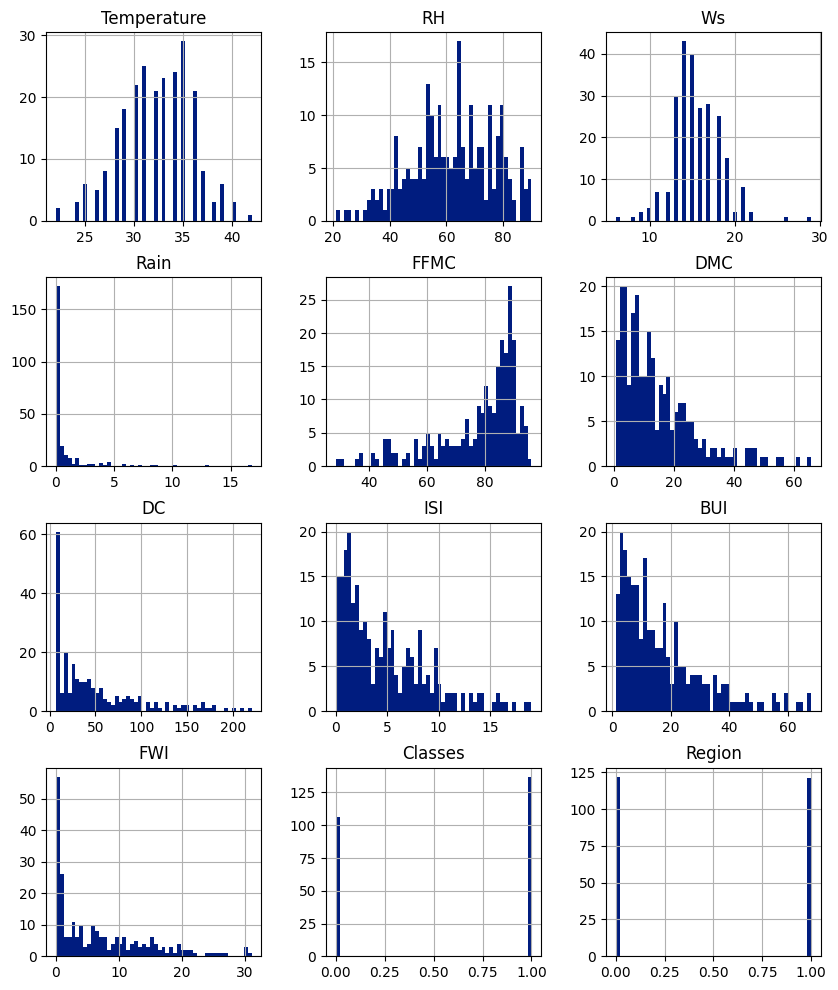

In [32]:


#Plot density plot for all features
plt.style.use('seaborn-v0_8-dark-palette')
df_copy.hist(bins=50,figsize=(10,12))
plt.show()

In [23]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [33]:
#percentage for pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

In [34]:
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

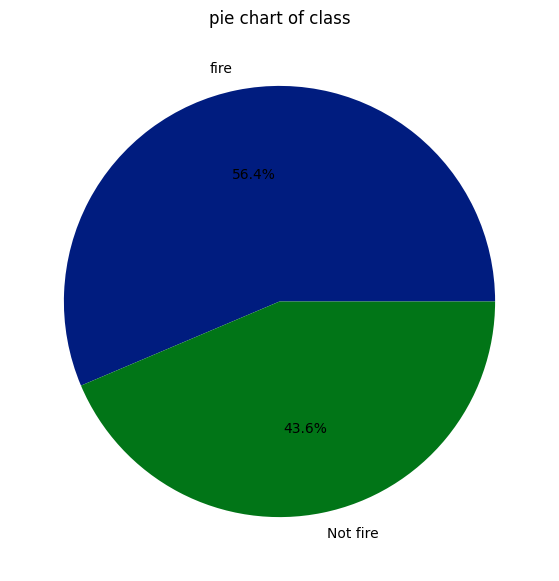

In [35]:
class_labels=['fire','Not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=class_labels,autopct='%1.1f%%')
plt.title('pie chart of class')
plt.show()

In [36]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

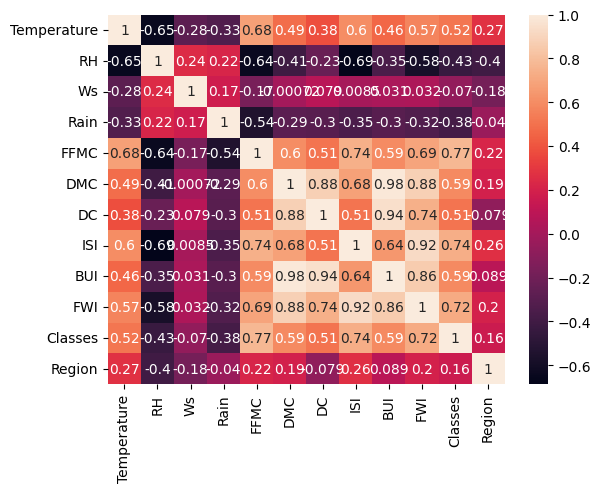

In [37]:
sns.heatmap(df_copy.corr(),annot=True)

In [38]:
#Monthly fire analysis
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [39]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [40]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Text(0.5, 1.0, 'fire analysis of sidi-belregions')

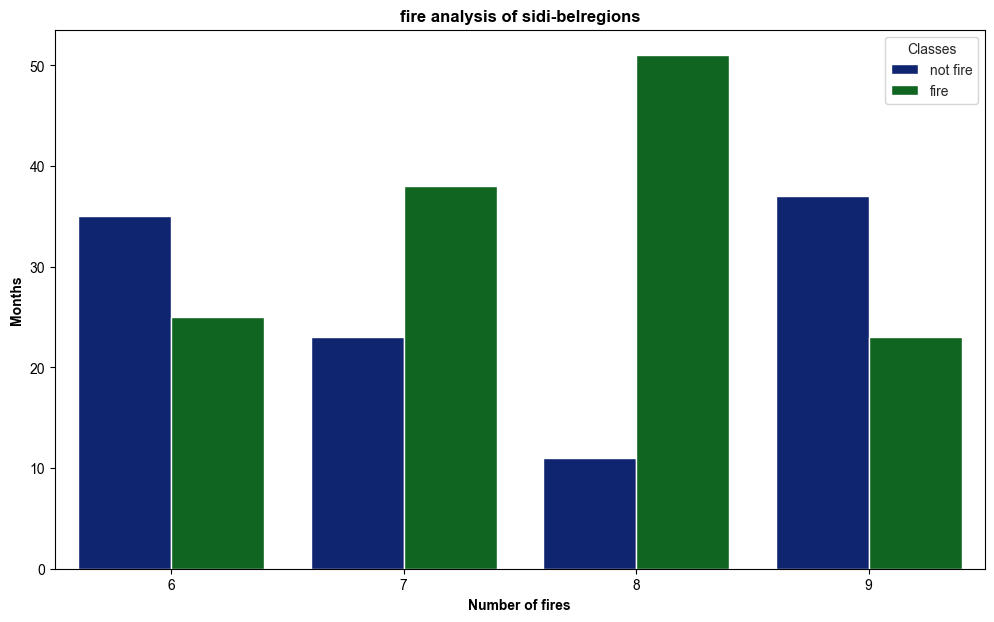

In [41]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(12,7))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('Number of fires',weight='bold')
plt.ylabel('Months',weight='bold')
plt.title('fire analysis of sidi-belregions',weight='bold')

July and August have high fires occurred  in both region.


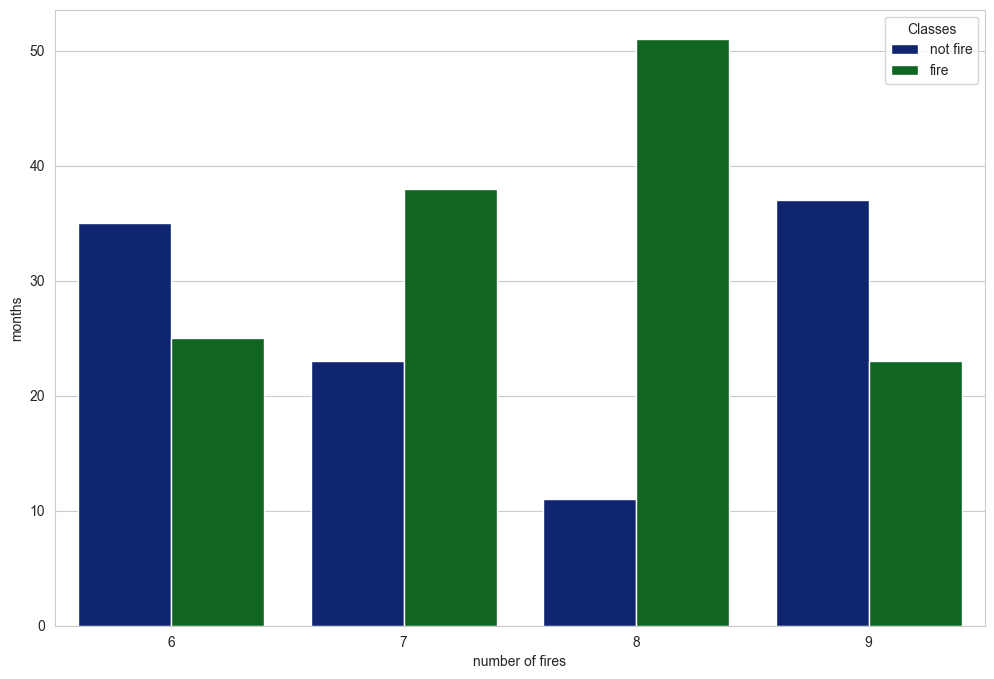

In [42]:
dftemp1= df[df['Region']==0]
plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('number of fires')
plt.ylabel('months')
plt.show()

In [43]:
#Model Training with different Models

In [44]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [45]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

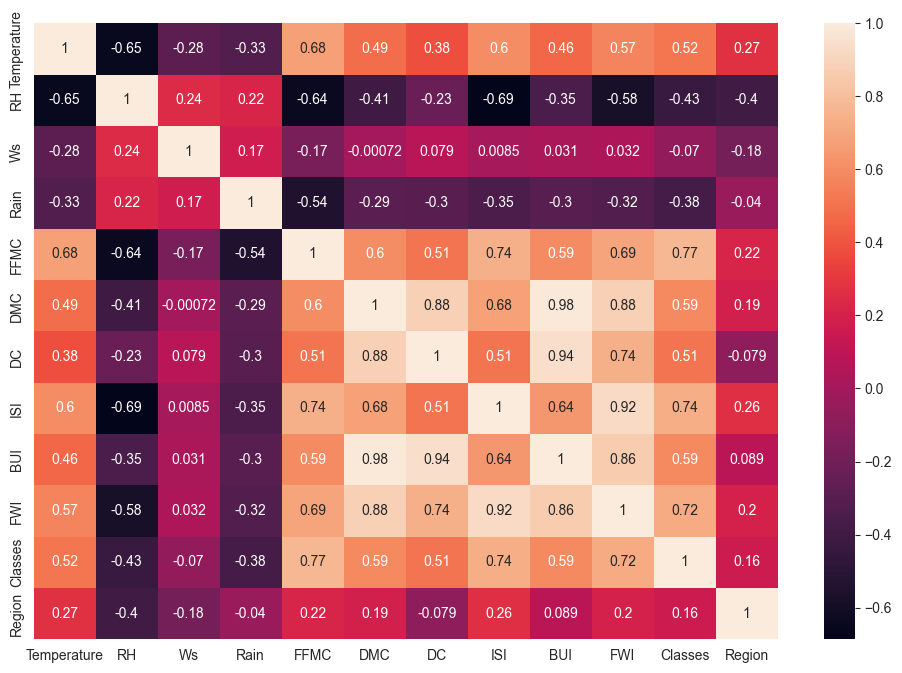

In [46]:
#check the multicolinearty
plt.figure(figsize=(12,8))
data=df_copy.corr()
sns.heatmap(data,annot=True)

In [47]:
def correlation(dataset,threshold):
    col=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>threshold:
                col_name=col_matrix.columns[i]
                col.add(col_name)
    return col
                

In [56]:
correlation_features=correlation(x_train,0.85)

In [57]:
correlation_features

{'BUI', 'DC'}

In [58]:
x_train.drop(correlation_features,axis=1,inplace=True)

x_test.drop(correlation_features,axis=1,inplace=True)


In [32]:
#Separate independent and dependent variable

In [48]:
x=df_copy.drop(['FWI'],axis=1)#Independent variables
y=df_copy['FWI']#Dependent 

In [49]:
y=df_copy['FWI']

In [50]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


: 

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)

In [59]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((194, 9), (49, 9), (194,), (49,))

In [73]:
#Feature scaling and standardization

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'After scaling the x_train')

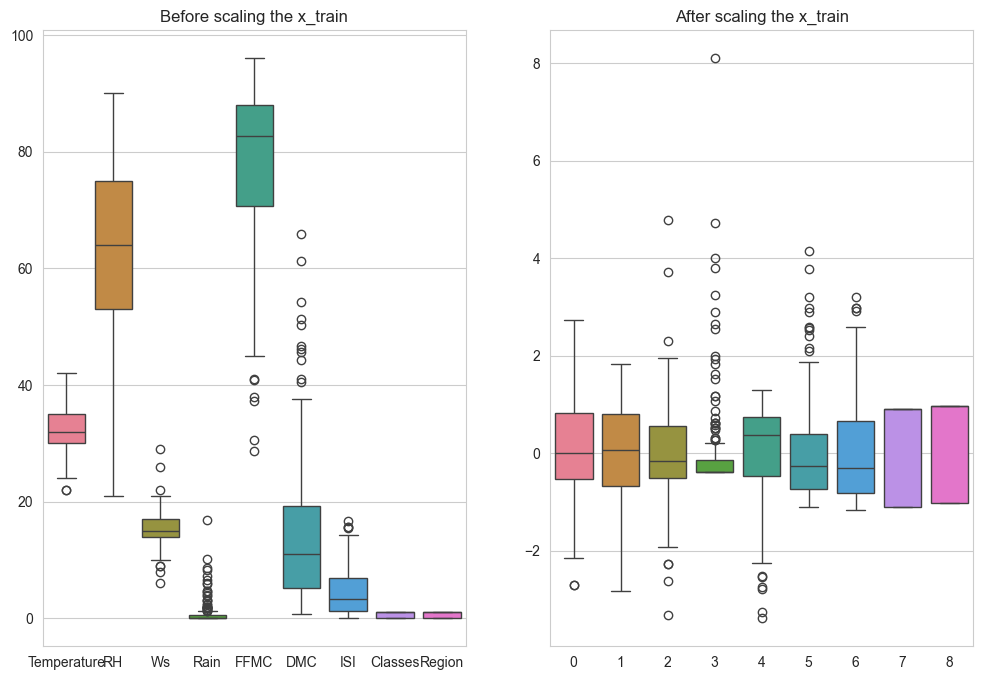

In [62]:
#Plot the boxplot find outliers
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title('Before scaling the x_train')
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title('After scaling the x_train')

1.0189918179906445
0.9137486539104


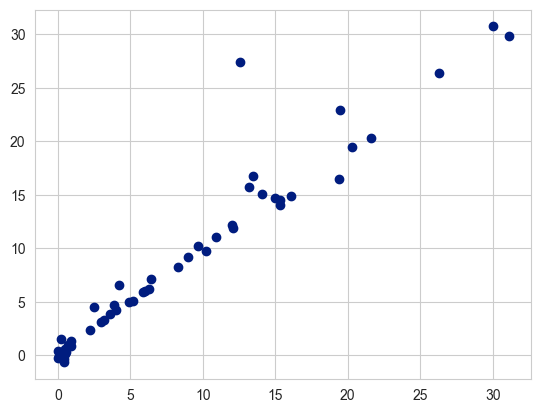

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linear=LinearRegression()
linear.fit(x_train_scaled,y_train)
y_predict=linear.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
print(mae)
score=r2_score(y_test,y_predict)
print(score)
plt.scatter(y_test,y_predict)

1.5482916735290084
0.9148428239456965


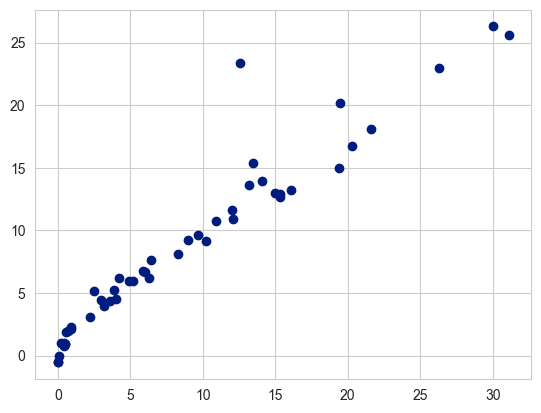

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_predict=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
print(mae)
score=r2_score(y_test,y_predict)
print(score)
plt.scatter(y_test,y_predict)

1.0181732618432373
0.9162872547435135


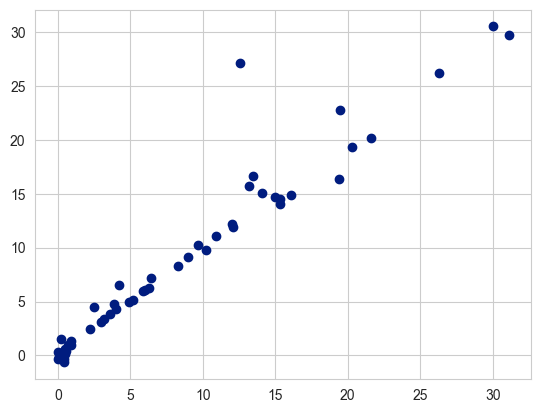

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_predict=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
print(mae)
score=r2_score(y_test,y_predict)
print(score)
plt.scatter(y_test,y_predict)

1.0126006654931854
0.9156802236033863


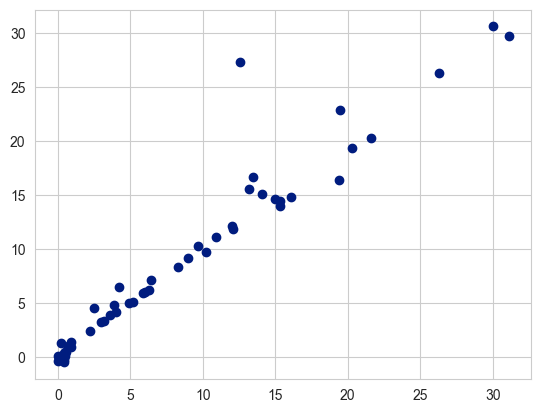

In [66]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_predict=lassocv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
print(mae)
score=r2_score(y_test,y_predict)
print(score)
plt.scatter(y_test,y_predict)

In [67]:
lassocv.n_features_in_

9

In [68]:
lassocv.n_iter_ 

27

In [69]:
lassocv.dual_gap_

np.float64(0.0004423054563400416)

In [70]:
lassocv.alphas_

array([6.71663729, 6.26395842, 5.84178858, 5.44807159, 5.0808898 ,
       4.73845483, 4.41909883, 4.12126636, 3.8435068 , 3.58446731,
       3.34288621, 3.11758686, 2.90747194, 2.71151807, 2.52877082,
       2.35834013, 2.1993959 , 2.05116398, 1.91292239, 1.78399783,
       1.66376234, 1.55163033, 1.44705564, 1.34952893, 1.2585752 ,
       1.17375144, 1.09464452, 1.02086915, 0.95206598, 0.88789992,
       0.82805844, 0.77225007, 0.720203  , 0.67166373, 0.62639584,
       0.58417886, 0.54480716, 0.50808898, 0.47384548, 0.44190988,
       0.41212664, 0.38435068, 0.35844673, 0.33428862, 0.31175869,
       0.29074719, 0.27115181, 0.25287708, 0.23583401, 0.21993959,
       0.2051164 , 0.19129224, 0.17839978, 0.16637623, 0.15516303,
       0.14470556, 0.13495289, 0.12585752, 0.11737514, 0.10946445,
       0.10208691, 0.0952066 , 0.08878999, 0.08280584, 0.07722501,
       0.0720203 , 0.06716637, 0.06263958, 0.05841789, 0.05448072,
       0.0508089 , 0.04738455, 0.04419099, 0.04121266, 0.03843

In [71]:
lassocv.intercept_

np.float64(6.635051546391753)

1.0181732618432373
0.9162872547435135


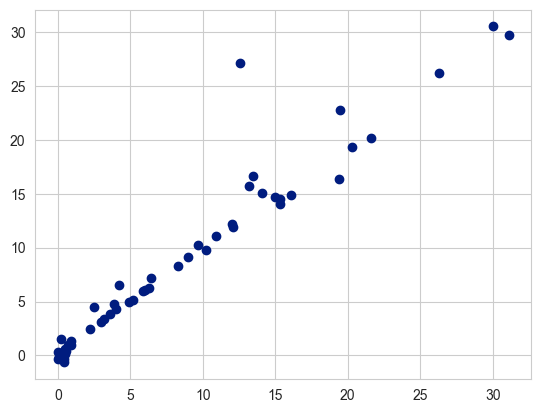

In [72]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_predict=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
print(mae)
score=r2_score(y_test,y_predict)
print(score)
plt.scatter(y_test,y_predict)

In [73]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

2.19683687433621
0.8615972947040409


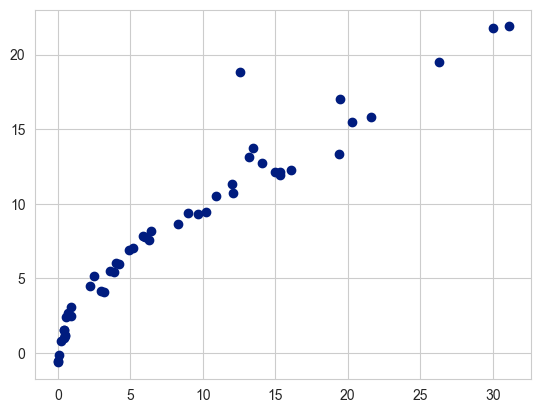

In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_predict=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
print(mae)
score=r2_score(y_test,y_predict)
print(score)
plt.scatter(y_test,y_predict)

In [75]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [76]:
import pickle

In [77]:
#pickle the machine learning models,preprocessing model standardscaler

In [78]:
scaler

StandardScaler()

In [79]:
ridge

Ridge()

In [80]:
pickle.dump(scaler,open('scalered.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))